In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Computing the cost funcion

def computeCost(theta,X,y):
    m=len(y) #len of an array returns the number of columns of the array
    cost=(1/(2*m))*np.sum(np.power(((X.dot(theta))-y),2)) 
    #.dot is to make sure matrix multiplication of array occurs. * is for element-wise
    #.sum returns the summation of all elements of the array
    return(cost)

In [16]:
#Vectorized approach for gradient descent

def gradientDescent(theta,X,y,alpha): 
    m=len(y)
    Xt=X.transpose() #.transpose is to transpose the matrix
    theta_new=theta-((alpha/m)*(Xt.dot((X.dot(theta))-y)))
    return(theta_new)

Insert the location of your text or csv file in quotes below

In [17]:
#Reading the data

raw_data=pd.read_csv('HousePricing.txt')#Insert location of file here

#Mean Normalization and inserting ones

data=(raw_data-raw_data.mean())/(raw_data.std()) 
#.mean,.std find the mean and standard deviation for every column in your Dataframe so you are simultaneously processing it
data.insert(0,'Ones',1) #DataFrameName.insert(location, column name, value, allow_duplicates = False)
data.head() #always print it at the end, else it won't come

,Ones,Square feet,#bedrooms,cost
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [18]:
#Separating X and Y data

cols=data.shape[1] #.shape is a tuple hence you call with []. 0 for row size and 1 for column size
X=data.iloc[:,0:cols-1] #iloc can be used to access the data in various ways
y=data.iloc[:,cols-1:cols]
X=np.array(X)
y=np.array(y) 

Choose number of iterations and the learning rate

In [19]:
#Initializations

iters=400 #number of iterations
alpha=0.01 #Learning rate

costs=np.zeros(iters+1)
theta=np.zeros([X.shape[1],1])#a numpy array can be used as a matrix only when it is like an array in an array [[0]], and not just [0]

#Learning

costs[0]=computeCost(theta,X,y)
for i in range(iters):
    theta=gradientDescent(theta,X,y,alpha)
    costs[i+1]=computeCost(theta,X,y)
print(theta)

[[ -1.23600893e-16]
 [  8.00441430e-01]
 [  2.93790099e-02]]


Text(0.5,1,'Cost function vs iterations')

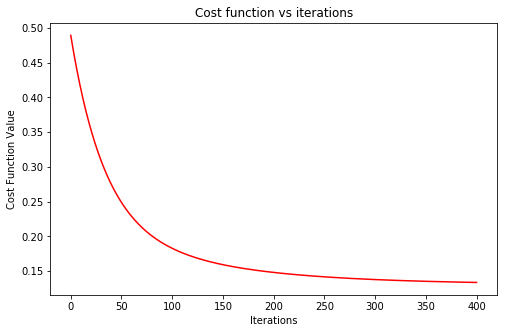

In [20]:
#Plotting cost function versus number of iterations

fig,ax=plt.subplots(figsize=(8,5))
ax.plot(np.arange(iters+1),costs,'r',label='Cost Function') #.arange returns evenly spaced values in a given interval
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Function Value')
ax.set_title('Cost function vs iterations')

In [21]:
#Checking error and accuracy

er0=((np.sqrt(costs[-1]*2*len(y)))/len(y))*100 #Error formula
print('error % = {}'.format(er0))
print('accuracy % = {}'.format(100-er0))

error % = 7.5423960760032145
accuracy % = 92.45760392399679


Insert your new input values in the inputs array [1,_,_...]<br>
For example if your data has two input features/variables, then inputs=[1,234,22] (input depending on your data)<br>
If your data has five input features/variables, then inputs=[1,2323,65,74,5474,35] (again, input depending on your data)

In [22]:
#Predicting new outputs

#Enter your input values here (Leave the first '1')
inputs=[1,1650,3]

mean=raw_data.mean()
stdi=raw_data.std()

for i in range (len(inputs)-1):
    inputs[i+1]=(inputs[i+1]-mean[i])/(stdi[i]) #Converting input to mean normalized input

new_out=(np.array([inputs])).dot(theta) 
corrected_out=(new_out*stdi[-1])+mean[-1] #Converting mean normalized output to actual output

print('Predicted output = ',float(corrected_out))

Predicted output =  295425.21591896744
